## 1. Introduction

In this project, I’ll explore the English Premier League and Championship datasets. The goal is to analyze how the game has evolved across seasons and answer four key questions:
  1. How have average goals per match changed across seasons in the Premier League compared to the Championship?

  2. Do disciplinary actions (yellow/red cards) show any noticeable trend over time?

  3. What is the relationship between shots taken and goals scored—does more shooting always mean more scoring?

  4. Which teams historically stand out as the most offensively productive (most goals per match)?

## 2. Imports and Data Loading

I’ll use pandas for data wrangling, numpy for numerical calculations, matplotlib and seaborn for visualization. I start by importing the Premier League and Championship datasets. This is significant because understanding the structure of the data (rows, columns, and types) is the foundation of our analysis. By loading and inspecting the datasets, I ensure that I know what features are available and can begin planning how to answer our questions.

In [11]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Load the Dataset
pl = pd.read_csv('England CSV.csv')
ch = pd.read_csv('England 2 CSV.csv')

In [13]:
pl.head()

,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,...,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
0,16/01/2025,2024/25,Ipswich Town,Brighton & Hove Albion,0,2,A,0.0,1.0,A,...,13.0,14.0,1.0,9.0,2.0,2.0,0.0,0.0,20250116,Premier League
1,16/01/2025,2024/25,Man United,Southampton,3,1,H,0.0,1.0,A,...,7.0,10.0,4.0,4.0,1.0,3.0,0.0,0.0,20250116,Premier League
2,15/01/2025,2024/25,Everton,Aston Villa,0,1,A,0.0,0.0,D,...,17.0,10.0,8.0,5.0,2.0,1.0,0.0,0.0,20250115,Premier League
3,15/01/2025,2024/25,Leicester,Crystal Palace,0,2,A,0.0,0.0,D,...,7.0,6.0,4.0,3.0,0.0,0.0,0.0,0.0,20250115,Premier League
4,15/01/2025,2024/25,Newcastle,Wolves,3,0,H,1.0,0.0,H,...,10.0,13.0,4.0,2.0,0.0,2.0,0.0,0.0,20250115,Premier League


In [14]:
ch.head()

,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,...,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
0,15/01/2025,2024/25,Blackburn,Portsmouth,3,0,H,0.0,0.0,D,...,15.0,19.0,5.0,6.0,1.0,3.0,0.0,0.0,20250115,English Second
1,14/01/2025,2024/25,Cardiff,Watford,1,1,D,0.0,0.0,D,...,8.0,14.0,7.0,3.0,1.0,2.0,0.0,0.0,20250114,English Second
2,14/01/2025,2024/25,Plymouth,Oxford,1,1,D,0.0,1.0,A,...,8.0,10.0,6.0,3.0,1.0,1.0,0.0,0.0,20250114,English Second
3,6/01/2025,2024/25,QPR,Luton,2,1,H,1.0,1.0,D,...,10.0,9.0,3.0,4.0,1.0,1.0,0.0,0.0,20250106,English Second
4,5/01/2025,2024/25,Sunderland,Portsmouth,1,0,H,1.0,0.0,H,...,9.0,10.0,7.0,3.0,1.0,2.0,0.0,1.0,20250105,English Second


In [15]:
# 2. Inspect the dataset
print(pl.shape)
print(pl.columns)
print(pl.dtypes)
print(pl.head())

(12153, 25)
Index(['Date', 'Season', 'HomeTeam', 'AwayTeam', 'FTH Goals', 'FTA Goals',
       'FT Result', 'HTH Goals', 'HTA Goals', 'HT Result', 'Referee',
       'H Shots', 'A Shots', 'H SOT', 'A SOT', 'H Fouls', 'A Fouls',
       'H Corners', 'A Corners', 'H Yellow', 'A Yellow', 'H Red', 'A Red',
       'Display_Order', 'League'],
      dtype='object')
Date              object
Season            object
HomeTeam          object
AwayTeam          object
FTH Goals          int64
FTA Goals          int64
FT Result         object
HTH Goals        float64
HTA Goals        float64
HT Result         object
Referee           object
H Shots          float64
A Shots          float64
H SOT            float64
A SOT            float64
H Fouls          float64
A Fouls          float64
H Corners        float64
A Corners        float64
H Yellow         float64
A Yellow         float64
H Red            float64
A Red            float64
Display_Order      int64
League            object
dtype: object
   

## Handling Missing Data 
 
Next, I’ll check for null values. Handling missing data is important because leaving nulls untreated can distort averages, sums, or visualizations. I chose to either fill them with appropriate values (like the mean) or drop them depending on the column’s importance. This step ensures our results are reliable.

In [16]:
nulls = pl.isnull().sum()
nulls

Date                0
Season              0
HomeTeam            0
AwayTeam            0
FTH Goals           0
FTA Goals           0
FT Result           0
HTH Goals         924
HTA Goals         924
HT Result         924
Referee          2824
H Shots          2824
A Shots          2824
H SOT            2824
A SOT            2824
H Fouls          2824
A Fouls          2824
H Corners        2824
A Corners        2824
H Yellow         2824
A Yellow         2824
H Red            2824
A Red            2824
Display_Order       0
League              0
dtype: int64

Handling Nulls:

For numerical columns (like goals, shots, cards), we’ll fill missing values with the mean.

For categorical columns (like team names), we’ll drop rows if key info is missing.

In [17]:
num_cols = pl.select_dtypes(include=np.number).columns
pl[num_cols] = pl[num_cols].fillna(pl[num_cols].mean())

num_cols_ch = ch.select_dtypes(include=np.number).columns
ch[num_cols_ch] = ch[num_cols_ch].fillna(ch[num_cols_ch].mean())

## Creating New Features

I’ll create a new column for total goals scored in each match by adding home and away goals. This is significant because it simplifies my analysis of scoring trends across seasons, which directly answers one of my core questions about how goal averages have changed over time. Feature Engineering:

In [21]:
# Convert dates
pl['Date'] = pd.to_datetime(pl['Date'], errors='coerce')
pl['Season'] = pl['Date'].dt.year


ch['Date'] = pd.to_datetime(ch['Date'], errors='coerce')
ch['Season'] = ch['Date'].dt.year

# Compute total goals
pl['TotalGoals'] = pl['FTH Goals'] + pl['FTA Goals']

ch['TotalGoals'] = ch['FTH Goals'] + ch['FTA Goals']

## Visualization 1: Average Goals per Match by Season  

This visualization shows the average number of goals per match for each season. It is significant because it reveals long-term scoring trends in English football, helping us see whether matches have become more or less offensive over time. 

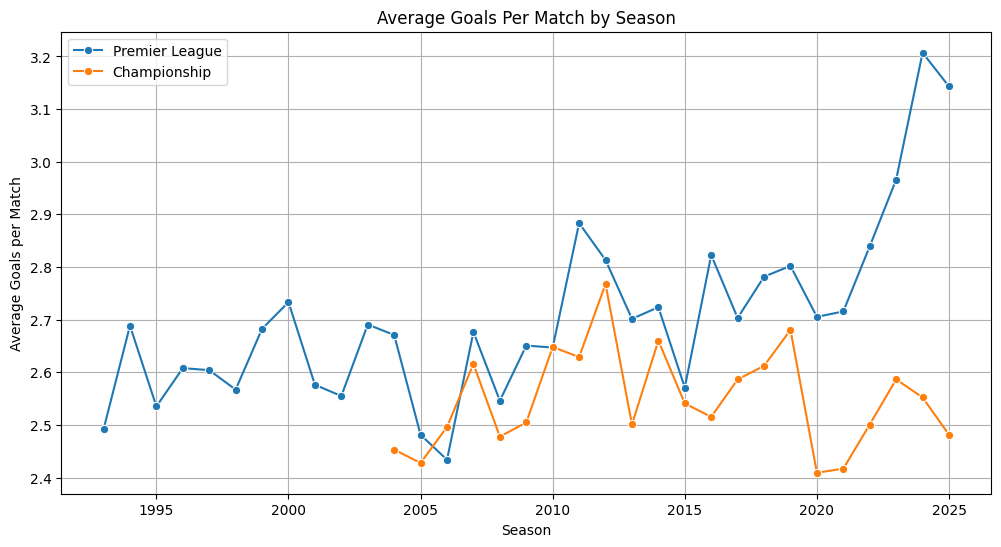

In [24]:
pl_goals = pl.groupby('Season')['TotalGoals'].mean()
plt.figure(figsize=(12,6))
sns.lineplot(x=pl_goals.index, y=pl_goals.values, marker="o", label="Premier League")

ch_goals = ch.groupby('Season')['TotalGoals'].mean()
sns.lineplot(x=ch_goals.index, y=ch_goals.values, marker="o", label="Championship")

plt.title("Average Goals Per Match by Season")
plt.xlabel("Season")
plt.ylabel("Average Goals per Match")
plt.legend()
plt.grid(True)
plt.show()

### Interpretation of Results  

From the visualization, we can see that the **Premier League** has shown a noticeable upward trend in average goals per match, especially in recent seasons where it exceeds 3 goals per game. This suggests that the league has become more offensively dynamic, possibly influenced by tactical changes, player quality, or rule adjustments favoring attacking play.  

In contrast, the **Championship** has remained more stable, with average goals per match generally hovering between 2.4 and 2.7. This indicates a tighter, more defensive style of play compared to the Premier League, with less fluctuation over time.  

The comparison highlights how different leagues within the same country can evolve differently, with the Premier League trending toward higher-scoring matches while the Championship stays relatively consistent.
